# Machine Learning

This week's workshop is all about machine learning. We're going to start simple, using decision trees, and gradually move to more complex models.


## Decision trees

Let's start with the simple decision trees that we learned about in this week's lecture. 

Decision trees are a type of supervised machine learning algorithm that is used for both classification and regression tasks. They work by repeatedly splitting the data into distinct nodes, which represent decision points based on the values of the input features. 


We will here use the decision tree to categorize data points in the Iris dataset.

The Iris dataset is one of the best-known and most frequently used datasets in the field of machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems." 

The dataset consists of 150 observations of iris flowers. There are three different species of iris included in the dataset:

- Iris setosa
- Iris versicolor
- Iris virginica

These have different petal lengths and widths. Our task is to train a decision tree so that it categorizes the flower species using these two properties.

Let's start by plotting the data, with the two features.

In [ ]:
# If you haven't instaled scikit-learn, now's the time. It's our go-to library for ML.
# !pip3 install scikit-learn

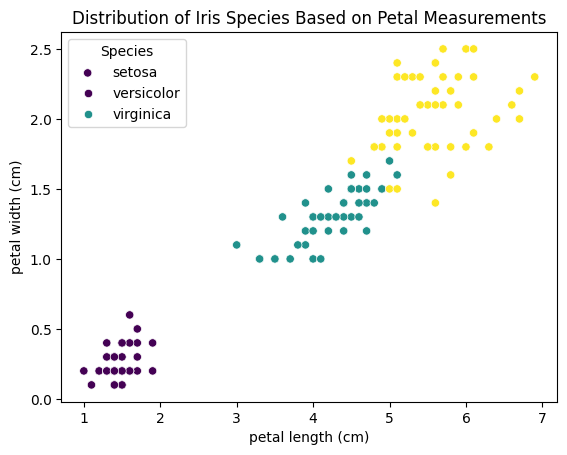

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
iris = load_iris()

# Convert the last two features (petal length and width) to a DataFrame
feature_names = iris.feature_names[2:4]  # This captures 'petal length (cm)' and 'petal width (cm)'
X = pd.DataFrame(iris.data[:, 2:4], columns=feature_names)
y = iris.target

# Add the target to the DataFrame for easier plotting
X['species'] = y

# Scatter plot for petal dimensions using seaborn for automatic legend handling
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')

plt.title('Distribution of Iris Species Based on Petal Measurements')
plt.legend(title='Species', labels=list(iris.target_names))
plt.show()


Now, let's train a Decision Tree to separate the three types of flowers!

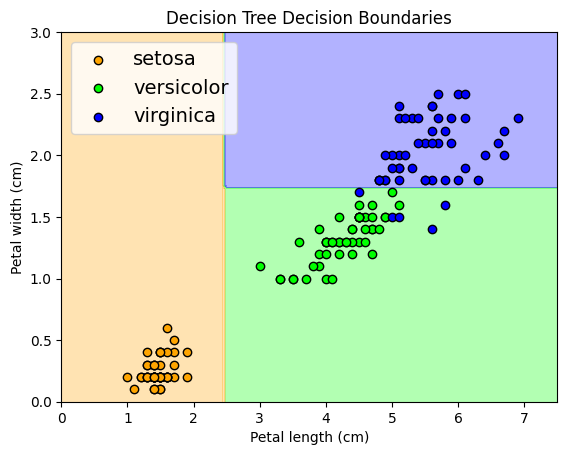

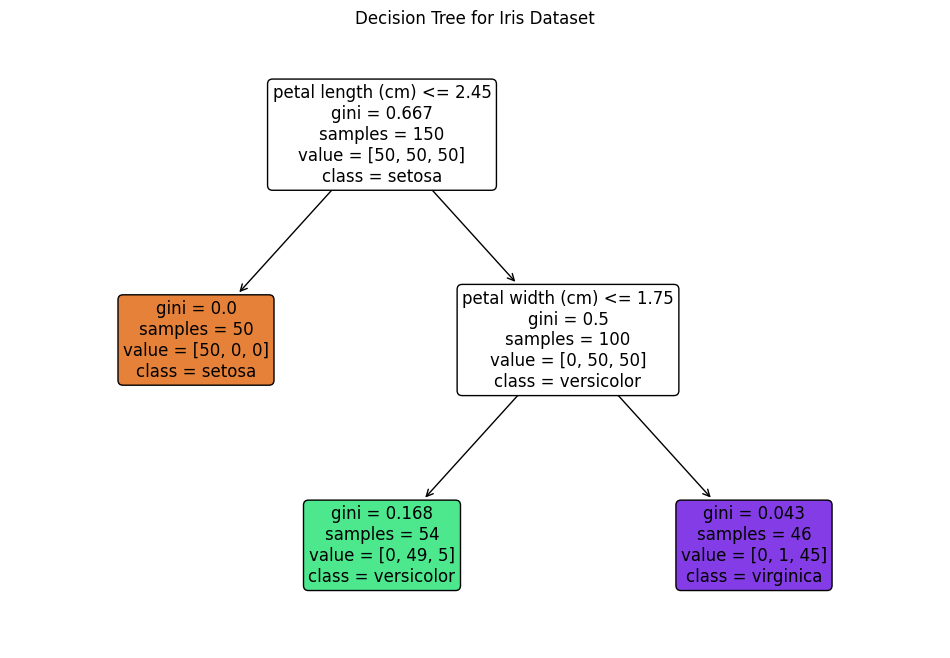

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create and fit the model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X.drop('species', axis=1), y)  # Ensure to drop the species column for training

def plot_decision_boundary(clf, X_df, axes=[0, 7.5, 0, 3]):
    # Define color map for consistent color usage in contourf and scatter plot
    cmap = ListedColormap(['#FFA500', '#00FF00', '#0000FF'])
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    X_new_df = pd.DataFrame(X_new, columns=X_df.columns[:-1])  # Use feature names
    y_pred = clf.predict(X_new_df).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    for i, class_name in enumerate(iris.target_names):
        plt.scatter(X_df[X_df['species'] == i].iloc[:, 0], X_df[X_df['species'] == i].iloc[:, 1], 
                    color=cmap(i), label=class_name, edgecolor='k')
    plt.axis(axes)
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.legend(loc="upper left", fontsize=14)

# Plotting the decision boundary
plot_decision_boundary(tree_clf, X, [0, 7.5, 0, 3])
plt.title("Decision Tree Decision Boundaries")
plt.show()

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names, rounded=True, fontsize=12)
plt.title('Decision Tree for Iris Dataset')
plt.show()

### Exercise 1: New observations 
<a href='#solution1'>Go to solution</a>

You come across some additional observations of flower petals. 
    [{'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}]

Can you identify their type manually by using the decision tree above? 

You can also use the model to do so, by using the .predict(X) function!


In [190]:
new_observations = [
    {'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}
]

# Convert to DataFrame
new_df = pd.DataFrame(new_observations)

# What type of flowers are these?

## Let's revisit Trump's tweets!

Machine learning allows flexible annotation and prediction from textual data. It can be used for nearly any text analysis tasks. 

In our case, we will focus on whether there are differences in the messages when Trump posts from iPhone and Android. 

He began to post from iPhone when he started as President, and it seems these message might actually come from his aids.

We train machine learning to guess based on the text in the tweets whether he is sending the message from Android or iPhone. Can we predict it?

In [ ]:
#We focus on the messages that are from iPhone or Android
df = pd.read_csv('trumptweets.csv')
df = df.loc[df['device'].isin(set(['Twitter for iPhone', 'Twitter for Android']))] 


In [ ]:
# Preprocess the text as usual
df['text'] = df['text'].apply(clean_text).apply(case_normalization).apply(tokenization).apply(remove_stopwords).apply(lemmatize)

The following code:

1. Splits the dataset into training and testing sets.
2. Vectorizes the messages using a bag-of-words model, excluding common English stop words for more meaningful feature analysis.
3. Trains a RandomForestClassifier on the vectorized training data.
4. Predicts the device category on the test data and prints out the classification report and accuracy.
5. Extracts and prints the feature importances to see which words are the most discriminative in terms of predicting the device used.

The most important features output will give you insight into which words are more characteristic of messages sent from either iphone or android. Keep in mind that feature importance in random forests doesn't always equate to causality, and high importance might be due to correlation rather than a causal relationship.

In [ ]:
# Train machine learning to identify 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
# The text is what we use to try to predict the device. 
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['device'], test_size=0.3, random_state=42)

# Vectorize the text messages into a bag-of-words model
vectorizer = CountVectorizer(stop_words='english') # Drop stopwords in English
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Use a machine learning classifier, in this case, a Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Predict the device used for the test set
predictions = classifier.predict(X_test_vectorized)

## This is the end of the ML code. Easy, no?
#-------
##### The rest is printing and evaluation ####

# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Get feature importances
feature_importances = classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Map feature importances to their corresponding words
feature_importance_dict = {word: importance for word, importance in zip(feature_names, feature_importances)}

# Sort the words by their feature importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print out the most important features (words)
# for word, importance in sorted_feature_importances[:20]:  # top 20 words
#     print(f"Word: {word}, Importance: {importance}")

# After fitting the CountVectorizer on the training set
X_vectorized = vectorizer.transform(df['text'])

# Create a DataFrame with the word counts
word_counts = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Add the device column back to the DataFrame
word_counts['device'] = df['device'].values

# Calculate the sum of word counts for each device
word_counts_sum = word_counts.groupby('device').sum()

# Now you can compare the word counts for each word in your feature importances list
for device in word_counts['device'].unique():
    print(f'\n {device}')
    for word, importance in sorted_feature_importances[:40]:  # top 20 words
        counts = word_counts_sum[word]
        more_common_in = counts.idxmax()
        if more_common_in == device:
            print(f"{word}, Importance: {importance}")

                     precision    recall  f1-score   support

Twitter for Android       0.92      0.85      0.89      4267
 Twitter for iPhone       0.93      0.96      0.95      8487

           accuracy                           0.93     12754
          macro avg       0.92      0.91      0.92     12754
       weighted avg       0.93      0.93      0.93     12754

Accuracy: 0.9261408185667241

 Twitter for iPhone
rt, Importance: 0.09219865618700993
https, Importance: 0.07479567686469239
democrats, Importance: 0.007854489610218278
fake, Importance: 0.004395329867710581
biden, Importance: 0.004356324246503931
news, Importance: 0.003770457493192382
whitehouse, Importance: 0.0037658816642760747
amp, Importance: 0.0032052454826699993
thank, Importance: 0.002850430960313691
president, Importance: 0.002721501564856787
great, Importance: 0.0026927675922088002
impeachment, Importance: 0.0025705125682693717
election, Importance: 0.002547904148514072
joe, Importance: 0.002355241776796686
obama,

### Question: Interpret model performance 

<a href='#answer'>Go to answer</a>

What do the results listed in the classification report above mean - precision, recall, f1-score? How well does the model distinguish between the two sets of messages? What does this imply?





## Exercise 2: Classifier: spam or ham?
<a href='#solution2'>Go to solution</a>

Your task is to adapt the classifier above to identify if a text message is spam or not. 

We will us an existing database of text messages. 

How high accuracy can you achieve? 

In [ ]:
# Load the spam file
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# [YOUR CODE HERE]

[Go to Solution](#exercise2)

# Have Wall Street Journal become more clickbaity? Analyzing text with LLMs and BERT!

Large Language Models have emerged as an important method for text analysis. 

BERT models are also large language models, and draw on a sophisticated understanding of language in their predictions.

Our task here will be to use these models to see how click-baity a news headline is. Our aim will be to test whether the WSJ has more clickbaity headlines since the rise of social media.


In [ ]:
import pandas as pd

### Classify using ollama and llama3.2

We can use ollama to analyze the text with just a prompt!

Let's try it!

We can use llama3.2 and ollama to analyze the headlines using zero-shot LLM text annotation.

This code takes one headline at the time and feeds it to llama3.2.

In [ ]:
# Note: ollama needs to be installed separately! Go to this github and follow the instructions!

# https://github.com/ollama/ollama
# !pip install ollama


In [1]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
  {
    'role': 'user',
    'content': 'Is the sky blue?',
  },
])
print(response['message']['content'])

The color of the sky can vary depending on the time of day, atmospheric conditions, and other factors. Here's a breakdown:

1. During the daytime, when the sun is overhead, the sky typically appears blue to our eyes. This is because of a phenomenon called Rayleigh scattering, where shorter (blue) wavelengths of light are scattered more than longer (red) wavelengths by the tiny molecules of gases in the Earth's atmosphere.
2. However, the color of the sky can change during sunrise and sunset. During these times, the sun's rays have to travel through more of the Earth's atmosphere, which scatters the shorter blue wavelengths even more. This is why the sky often appears more red or orange during sunrise and sunset.
3. At night, the sky typically appears dark, but it can also take on a range of colors depending on atmospheric conditions. For example, during a full moon, the sky can appear yellowish or reddish due to the scattering of light by the moon's surface.
4. In some cases, the sky c

In [8]:
import ollama

# This is our classification prompt
PROMPT = """On a scale from 1 to 10, how 'clickbaity' is this headline? 
Rate it based on how much it uses sensational language, emotional appeal, or curiosity gaps to attract clicks — 
where 1 means not at all clickbaity (neutral and informative), and 10 means extremely clickbaity (highly sensational or manipulative).
[Respond ONLY with the number. Do not motivate!]"""

def analyze_message(text):
  response = ollama.chat(model='llama3.2', messages=[
    {
      'role': 'user',
      'content': f'{PROMPT}. \n \n"{text}"?',
    },
  ])
  return response['message']['content']




In [10]:
analyze_message("'Bloomingdale's Union Asked to Forgo Raise'")

'8'

Ok, this suggests the model doesn't work very well. llama is fast, but not great for annotation.

But we're going ahead anyway because we're just trying to learn! :)

Let's use this to see how clickbaity WSJ headlines are, and if it's changed over time!

In [13]:
import pandas as pd 
headlines = pd.read_csv('wsj_headlines.csv')

In [ ]:
# Extract year 
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['year'] = df['Date'].dt.year

In [14]:
sample = headlines.sample(1000)

In [15]:
# We start by defining a new column with the result
sample['clickbaitiness'] = None

In [ ]:

# We store original persistently
sample.to_csv('sample.csv.gz',compression='gzip',index=False)
import time 
i = 0
while(True):

    #Find all unprocessed lines; where 
    left = sample.loc[sample['clickbaitiness'].isna()]
    
    #No lines left? Then we're done
    if len(left)==0:
        print("All done!")
        break
        
    #Take a random line
    line = left.sample()
    index = line.index.values[0]
    text = line['Headline'].values[0]
    
    print(f"There are {len(left)} left to process. Processing: {index}")
    
    #Analyze the specific line, chunk by chunk    
    result = analyze_message(text)
    sample.loc[index,'clickbaitiness'] = result 

    i+=1    
    #Save the result to persistent file
    sample.to_csv('sample.csv.gz',compression='gzip',index=False)

In [27]:
sample['clickbaitiness'] = sample['clickbaitiness'].astype(int)

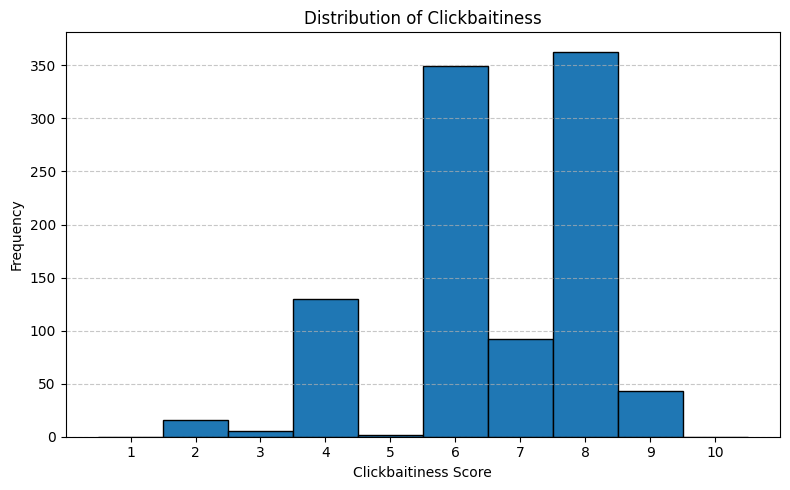

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: your DataFrame is called df and has the column 'clickbaitiness'
# df = pd.read_csv('your_file.csv')  # if needed

plt.figure(figsize=(8, 5))
plt.hist(sample['clickbaitiness'], bins=range(1, 12), edgecolor='black', align='left')
plt.xlabel('Clickbaitiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Clickbaitiness')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
# Extract year 
sample['Date'] = pd.to_datetime(sample['Date'], format='%m/%d/%Y')
sample['year'] = sample['Date'].dt.year

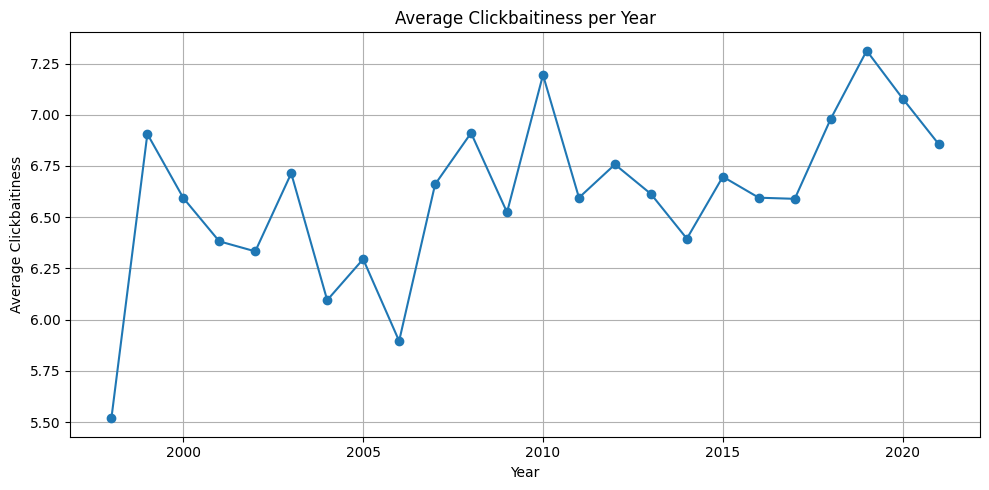

In [34]:
# Let's plot average clickbaitness by year to see if we have a trend!


# Group by year and calculate the mean clickbaitiness
yearly_avg = sample.groupby('year')['clickbaitiness'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg['clickbaitiness'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Clickbaitiness')
plt.title('Average Clickbaitiness per Year')
plt.grid(True)
plt.tight_layout()
plt.show()

LLM says that it seems to be on the rise! 

In [30]:
# These are packages for the BERT model.

# !pip install transformers torch sklearn

### Finetuning a BERT model

A BERT model is a slightly different approach: it is a supervised model, so we need to finetune it to the purpose.

For that, we need some training data that has the 'solution'.

We will use a dataset of annotated article headlines that are either clickbaity or not. 


In [35]:
df  = pd.read_csv('clickbait_data.csv')


In [36]:
df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from torch.utils.data import Dataset
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
import numpy as np

# 1. Load and preprocess your data
df = pd.read_csv('clickbait_data.csv')  # adjust path
df = df[['headline', 'clickbait']].dropna()

# 2. Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['headline'].tolist(), df['clickbait'].tolist(), test_size=0.2, random_state=42)

# 3. Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 4. Tokenize the data
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

# 5. Create Dataset class
class ClickbaitDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ClickbaitDataset(train_encodings, train_labels)
val_dataset = ClickbaitDataset(val_encodings, val_labels)

# 6. Load pre-trained model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# 7. Define metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=1)[:, 1].numpy()

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    auc = roc_auc_score(labels, probs)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': auc
    }

# 8. Training configuration
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 9. Train the model with metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

# 10. Evaluate on validation set
metrics = trainer.evaluate()
print(metrics)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/homebrew/lib/python3.13/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/72/yhvs2cms3j9cxd1ln67f720h0000gn/T/ipykernel_19389/3664122688.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.053100,0.057370
2,0.016600,0.065043
3,0.003900,0.063605


TrainOutput(global_step=4800, training_loss=0.02988074136742701, metrics={'train_runtime': 1241.0604, 'train_samples_per_second': 61.883, 'train_steps_per_second': 3.868, 'total_flos': 1341866382336000.0, 'train_loss': 0.02988074136742701, 'epoch': 3.0})

In [41]:
# Let's try out our new model!

from transformers import pipeline

# Create a pipeline for classification
clickbait_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Example headline
headline = "10 Things You Won't Believe Happened on Mars"
scores = clickbait_classifier(headline)[0]

# Extract the probability of being clickbait (label 1)
clickbait_prob = [s['score'] for s in scores if s['label'] == 'LABEL_1'][0]
print(f"Clickbait probability: {clickbait_prob:.2f}")


Device set to use mps:0


Clickbait probability: 1.00


Seems to work! 

### Apply model to analyze the headlines

In [43]:
wsj = pd.read_csv('wsj_headlines.csv')

In [47]:
from tqdm import tqdm

batch_size = 32
results = []

for i in tqdm(range(0, len(wsj), batch_size)):
    batch = wsj['Headline'].iloc[i:i+batch_size].tolist()
    outputs = clickbait_classifier(batch)
    for o in outputs:
        clickbait_prob = next(s['score'] for s in o if s['label'] == 'LABEL_1')
        results.append(clickbait_prob)

wsj['clickbaitiness'] = results

  0%|          | 0/601 [00:00<?, ?it/s]

 50%|█████     | 302/601 [02:53<02:54,  1.71it/s]

## Solutions:
<a id="exercise1"></a>


<a id='solution1'></a>

### Solution 1: New flower

In [27]:
new_observations = [
    {'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}
]

# Convert to DataFrame
new_df = pd.DataFrame(new_observations)

# Predict species
predicted_species = tree_clf.predict(new_df)

# Print the predictions
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['versicolor' 'versicolor' 'virginica']


<a id='answer'></a>

### Answer: Interpret classification report

*Precision:* This metric measures the accuracy of *positive* predictions. It is defined as the ratio of true positives to the sum of true and false positives. Precision essentially answers the question: "Of all the messages that were labeled as coming from a specific device, how many were actually from that device?"

- Twitter for Android: 0.92 precision means that 92% of messages predicted to be from Android were correctly identified.
- Twitter for iPhone: 0.93 precision indicates that 93% of messages predicted to be from iPhone were correctly identified.

*Recall (Sensitivity)*: This metric measures the ability of the model to find all the relevant cases (all actual positives). It is the ratio of true positives to the sum of true positives and false negatives. Recall answers the question: "Of all the messages that actually came from a specific device, how many did the model correctly identify?"

- Twitter for Android: 0.85 recall suggests that the model correctly identified 85% of all actual Android messages.
- Twitter for iPhone: 0.96 recall indicates that 96% of actual iPhone messages were correctly identified by the model.

*F1-Score*: The harmonic mean of precision and recall. It is a way to combine both precision and recall into a single measure that captures both properties. 
- Twitter for Android: 0.89 F1-score indicates a good balance between precision and recall for Android.
- Twitter for iPhone: 0.95 F1-score shows an excellent balance for iPhone, suggesting effective classification.

*Support*: This simply counts the number of true instances for each label in the data, which gives insight into the dataset's skewness.
- Twitter for Android: 4267 messages
- Twitter for iPhone: 8487 messages

#### Conclusion:
The model performs quite well, with high scores across all metrics. It is particularly effective at identifying messages from the iPhone, as indicated by higher recall and F1-score. 

## Solution 2: Spam or ham?
<a id='solution2'></a>

We can use almost exactly the same code as for the Trump tweets

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data preparation
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

texts = np.array(df['v2'])
labels = np.array([0 if t=='ham' else 1 if t=='spam' else None for t in df['v1']])  # 1 - spam, 0 - not spam

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

